# Name and Student ID:
- Hoang Ngoc Quan
- 22521178

In [1]:
!git clone https://github.com/CityScope/CSL_HCMC

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


<Axes: >

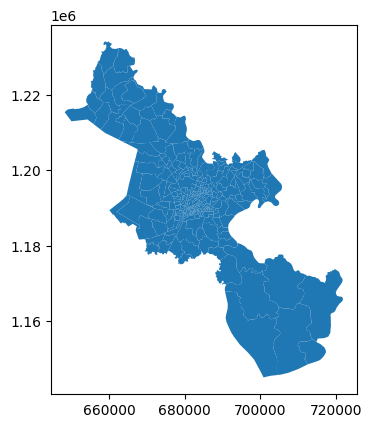

In [2]:
import geopandas as gpd

# Load a GeoDataFrame from a shapefile
data_folder = "/content/CSL_HCMC"
path = "/Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp"
gdf = gpd.read_file(data_folder + path)

# Perform spatial operation, e.g., plotting
gdf.plot()

In [3]:
gdf.head()

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.81 11..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.16 11..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1..."


In [4]:
column_names = gdf.columns
print(column_names)
gdf.info()

Index(['Com_Name', 'Dist_Name', 'Com_ID', 'Dist_ID', 'Level', 'Pop_2009',
       'Pop_2019', 'Den_2009', 'Den_2019', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Com_Name    322 non-null    object  
 1   Dist_Name   322 non-null    object  
 2   Com_ID      322 non-null    object  
 3   Dist_ID     322 non-null    object  
 4   Level       322 non-null    object  
 5   Pop_2009    322 non-null    float64 
 6   Pop_2019    322 non-null    float64 
 7   Den_2009    322 non-null    float64 
 8   Den_2019    322 non-null    float64 
 9   Shape_Leng  322 non-null    float64 
 10  Shape_Area  322 non-null    float64 
 11  geometry    322 non-null    geometry
dtypes: float64(6), geometry(1), object(5)
memory usage: 30.3+ KB


## 1. Phường nào có diện tích lớn nhất

In [5]:
def get_com_dist_name(largest_ward):
    return f"{largest_ward['Com_Name']}/{largest_ward['Dist_Name']}"

gdf['area'] = gdf.geometry.area # Add 'area' column

largest_ward = gdf.loc[gdf['Shape_Area'].idxmax()]

print(f"Phường có diện tích lớn nhất: {get_com_dist_name(largest_ward)}, Diện tích: {largest_ward['area']:.2f}")

Phường có diện tích lớn nhất: Ly Nhon/Can Gio, Diện tích: 161193856.43


## 2. Phường nào có dân số 2019 (Pop_2019) cao nhất

In [6]:
largest_pop_ward = gdf.loc[gdf['Pop_2019'].idxmax()]

print(f"Phường có dân số 2019 cao nhất: {get_com_dist_name(largest_pop_ward)}, Dân số: {largest_pop_ward['Pop_2019']:.2f}")

Phường có dân số 2019 cao nhất: Vinh Loc A/Binh Chanh, Dân số: 124709.00


## 3. Phường nào có diện tích nhỏ nhất

In [7]:
smallest_ward = gdf.loc[gdf['Shape_Area'].idxmin()]

print(f"Phường có diện tích nhỏ nhất: {get_com_dist_name(smallest_ward)}, Diện tích: {smallest_ward['area']:.2f}")

Phường có diện tích nhỏ nhất: Ward 3/District 10, Diện tích: 101642.93


## 4. Phường nào có dân số thấp nhất (2019)

In [8]:
smallest_pop_ward = gdf.loc[gdf['Pop_2019'].idxmin()]

print(f"Phường có dân số 2019 thấp nhất: {get_com_dist_name(smallest_pop_ward)}, Dân số: {smallest_pop_ward['Pop_2019']:.2f}")

Phường có dân số 2019 thấp nhất: An Khanh/District 2, Dân số: 223.00


## 5. Phường nào có tốc độ tăng trưởng dân số nhanh nhất (dựa trên Pop_2009 và Pop_2019)

In [9]:
gdf['growth_rate'] = (gdf['Pop_2019'] - gdf['Pop_2009']) / gdf['Pop_2009'] * 100

fastest_growth_ward = gdf.loc[gdf['growth_rate'].idxmax()]

print(f"Phường có tốc độ tăng trưởng dân số nhanh nhất: {get_com_dist_name(fastest_growth_ward)}, Tốc độ: {fastest_growth_ward['growth_rate']:.2f} %")

Phường có tốc độ tăng trưởng dân số nhanh nhất: Phu Huu/District 9, Tốc độ: 205.79 %


## 6. Phường nào có tốc độ tăng trưởng dân số thấp nhất

In [10]:
slowest_growth_ward = gdf.loc[gdf['growth_rate'].idxmin()]

print(f"Phường có tốc độ tăng trưởng dân số thấp nhất: {get_com_dist_name(slowest_growth_ward)}, Tốc độ: {slowest_growth_ward['growth_rate']:.2f} %")

Phường có tốc độ tăng trưởng dân số thấp nhất: An Khanh/District 2, Tốc độ: -98.58 %


## 7. Phường nào có biến động dân số nhanh nhất

In [11]:
gdf['diff'] = abs(gdf['Pop_2019'] - gdf['Pop_2009'])

fastest_growth_ward = gdf.loc[gdf['diff'].idxmax()]

print(f"Phường có biến động dân số nhanh nhất: {get_com_dist_name(fastest_growth_ward)}, Biến động: {fastest_growth_ward['diff']:.2f} people")

Phường có biến động dân số nhanh nhất: Vinh Loc A/Binh Chanh, Biến động: 74763.00 people


## 8. Phường nào có biến động dân số chậm nhất

In [12]:
slowest_growth_ward = gdf.loc[gdf['diff'].idxmin()]

print(f"Phường có biến động dân số chậm nhất: {get_com_dist_name(slowest_growth_ward)}, Biến động: {slowest_growth_ward['diff']:.2f} people")

Phường có biến động dân số chậm nhất: Ward 2/Binh Thanh, Biến động: 4.00 people


## 9. Phường nào có mật độ dân số cao nhất (2019)

In [13]:
highest_density_ward = gdf.loc[gdf['Den_2019'].idxmax()]

print(f"Phường có mật độ dân số cao nhất (2019) là: {get_com_dist_name(highest_density_ward)}, Mật độ: {highest_density_ward['Den_2019']:.2f} người/m2")

Phường có mật độ dân số cao nhất (2019) là: Ward 8/District 4, Mật độ: 96188.70 người/m2


## 10. Phường nào có mật độ dân số thấp nhất (2019)

In [14]:
lowest_density_ward = gdf.loc[gdf['Den_2019'].idxmin()]
print(f"Phường có mật độ dân số thấp nhất (2019) là: {get_com_dist_name(lowest_density_ward)}, Mật độ: {lowest_density_ward['Den_2019']:.2f} người/m2")

Phường có mật độ dân số thấp nhất (2019) là: Ly Nhon/Can Gio, Mật độ: 32.67 người/m2


In [15]:
print("Author: Hoang Ngoc Quan - 22521178. Thank you the professor!")

Author: Hoang Ngoc Quan - 22521178. Thank you the professor!
